<a href="https://colab.research.google.com/github/shalindasuresh/machine_learning_python/blob/main/iris_knn_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbor(KNN) classification on Iris dataset

####Import sklearn and iris dataset from sklearn repository

In [82]:
from sklearn.datasets import load_iris #Import Iris dataset from SKLearn
from sklearn.model_selection import train_test_split #Import Train/Test Data split function

####Import numpy library

In [83]:
import numpy as np

####Import pandas Library

In [84]:
import pandas as pd

####Create dataframe using pandas library

In [85]:
iris= load_iris() #Load dataset into a python variable
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names) #Create pandas dataframe for iris dataset

In [86]:
iris_df["target"]=iris.target #Create a new column in dataframe for target variable

In [87]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [88]:
iris_df.loc[iris_df['target']==0, 'species'] = 'setosa'
iris_df.loc[iris_df['target']==1, 'species'] = 'versicolor'
iris_df.loc[iris_df['target']==2, 'species'] = 'virginica'

In [89]:
iris_df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


#### Display schema of our dataframe

In [90]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Count number of iris flowers per species available

In [91]:
iris_df.groupby(['species']).size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

#### Display basic statistical summary for iris dataset

In [92]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Plot measurements of iris flowers using matplotlib library

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

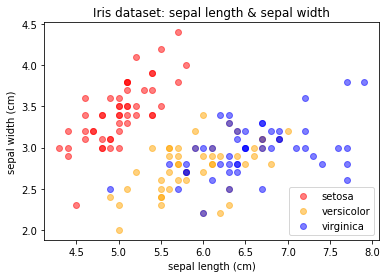

In [94]:
colours = ['red', 'orange', 'blue']
species = ['setosa', 'versicolor', 'virginica']

for i in range(0, 3):    
    species_df = iris_df[iris_df['target'] == i]    
    plt.scatter(        
        species_df['sepal length (cm)'],        
        species_df['sepal width (cm)'],
        color=colours[i],        
        alpha=0.5,        
        label=species[i]   
    )

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris dataset: sepal length & sepal width')
plt.legend(loc='lower right')

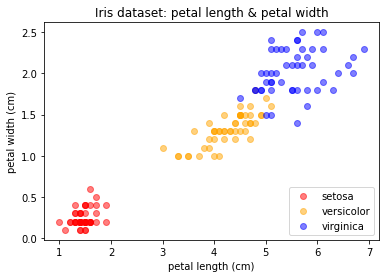

In [95]:
colours = ['red', 'orange', 'blue']
species = ['setosa', 'versicolor', 'virginica']

for i in range(0, 3):    
    species_df = iris_df[iris_df['target'] == i]    
    plt.scatter(        
        species_df['petal length (cm)'],        
        species_df['petal width (cm)'],
        color=colours[i],        
        alpha=0.5,        
        label=species[i]   
    )

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Iris dataset: petal length & petal width')
plt.legend(loc='lower right')

#### Create features and Target variable

In [96]:
X = iris_df.drop(['target','species'], axis=1)
y = iris_df.target

#### Split Train/Test data for our machine learning model

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

#### Initial machinea learning model from sklearn

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3) #We initiate machine learning model and set n_neighbors to 3. other parameters take default values

#### Train machine learning model

In [99]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### Evaluate machine lerning model performance

In [100]:

knn_model.score(X_test, y_test) #Lets See how the model performs on the test data.

0.9777777777777777

#### Predict answer for new values

In [101]:
X_new = np.array([[6.7,3.0,5.2,2.3]])

prediction = knn_model.predict(X_new)
print("Predicted Iris species: {}".format(iris['target_names'][prediction]))

Predicted Iris species: ['virginica']
